In [22]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


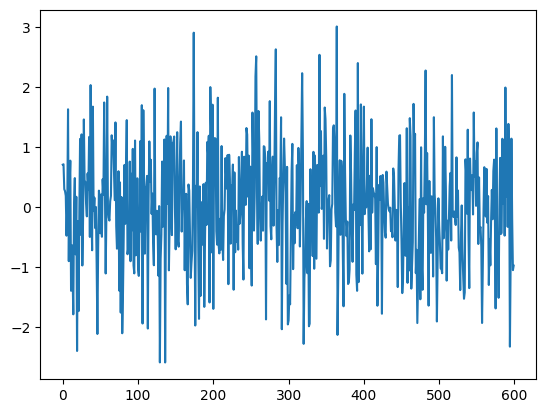

In [142]:
white_noise = np.random.normal(0,1,600)
plt.plot(white_noise)
plt.show()

In [127]:
def AR_generator(param,c,iter=300):
    p = len(param)
    error = np.random.normal(0, 1, size=iter)
    values = np.zeros(iter)
    values[:p] = np.random.rand(p)
    for t in range(p,iter):
        values[t] = c + np.sum([param[i] * values[t-1-i] for i in range(p)]) + error[t]
    return values

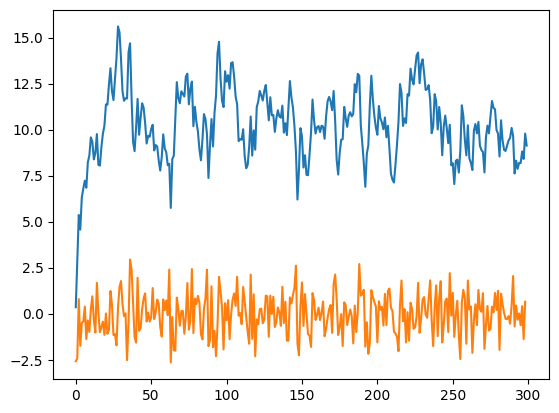

In [154]:
phi = [0.8]
to_plot = AR_generator(phi,2,iter=300)
diff_AR = to_plot[:299]-to_plot[1:]
plt.plot(to_plot)
plt.plot(diff_AR)
plt.show()

In [148]:
diff_AR

array([-8.81750028e-01, -1.37779446e+00, -1.57138488e+00,  2.79568000e-01,
       -3.96320598e-01,  4.34761389e-01,  1.73184505e-01,  2.26396902e+00,
       -8.50564031e-01, -3.82279796e-01, -1.89188170e-01, -2.16832085e+00,
        2.41319450e-01,  2.08555645e+00,  5.45899797e-01, -7.60886145e-01,
        1.68371587e-01, -1.18759697e+00, -1.54961501e+00,  1.75466930e+00,
       -5.57897641e-01, -1.11096141e+00,  1.04870592e+00, -5.19602925e-02,
       -5.23181011e-01,  8.35978326e-01, -2.36806301e-01, -8.78648023e-01,
        8.47506047e-01,  3.87809331e-03,  6.27240627e-01,  7.62338077e-01,
        7.27663040e-01,  3.90101642e-01, -6.94697521e-01,  1.35495068e+00,
       -3.39646345e+00,  1.10440468e+00,  6.38339458e-01,  4.26552001e-01,
        5.11144187e-01,  1.05680192e+00, -2.14421649e+00,  1.10742459e+00,
       -5.33040852e-01, -9.34627980e-01, -8.58274194e-01, -2.77833498e-01,
       -1.12031313e-01,  1.57298509e+00, -1.21612806e-01,  1.49960875e+00,
       -2.92841924e+00,  